In [1]:
# The best model minimizes the error of the model or maximizes the likelihood of the data
# It will represent the solution to some sort of optimization problem

# One approach to solving optimization problems is called the gradient descent

## The Idea Behind Gradient Descent

In [2]:
# The gradient is the vector of partial derivatives.  This gives the input direction in which the function most
# quickly increases
# Pick a random starting point, compute the gradient, take a small step in the direction of the gradient
# function increase most = maximization, function decrease = minimization

## Estimating the Gradient

No handles with labels found to put in legend.


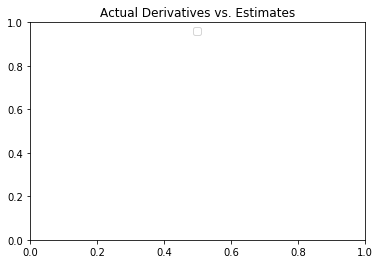

In [9]:
# If f is a function of one variabl, its derivative at a point x measures how f(x) changes when we make a small
# change to x (The limit of the difference quotients)
def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h # as h approaches 0
def square(x):
    return x * x
def derivative(x):
    return 2 * x
from functools import partial

# Derivative is the slope of the tangent line at (x, f(x))
derivative_estimate = partial(difference_quotient, square, h=0.0001)
# plot to show they're basically the same
import matplotlib.pyplot as plt
x = range(-10, 10)
plt.title("Actual Derivatives vs. Estimates")
#plt.plot(x, map(derivative, x), 'rx', label='Actual')
#plt.plot(x, map(derivative_estimate, x), 'b+', label='Estimate')
plt.legend(loc=9)
plt.show()

# Calculate the ith partial derivative by tearting it as a function of just the ith variable, holding others fixed
def partial_difference_quotient(f, v, i, h):
    """compute the ith partial difference quotient of f at v"""
    w = [v_j + (h if j == i else 0)     # add h to just the ith element of v
        for j, v_j in enumerate(v)]
    
    return (f(x) - f(v)) / h

# Estimate using difference quotients is computationally expensive


## Using the Gradient

In [11]:
# Let's use gradients to find the minimum among all 3-D vectors
import random 

def step(v, direction, step_size):
    """move step_size in the direction from v"""
    return [v_i + step_size * direction_i
           for v_i, direction_i in zip(v, direction)]
def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v] 
# pick a random starting point
v = [random.randint(-10, 10) for i in range(3)]

tolerance = 0.0000001

while True:
    gradient = sum_of_squares_gradientRuntimeError: matplotlib does not support generators as input(v)            # compute the gradient at v
    next_v = step(v, gradient, -0.01)                # take a negative gradient step
    if distance(next_v, v) < tolerance:              # stop if we're converging
        break
    v = next_v                                       # continue if we're not

NameError: name 'distance' is not defined

## Stochastic Gradient Descent

In [ ]:
# This computes the gradient (and takes a step) for only one point at a time
# Cycles over data repeatedly until it reaches a stopping point

def in_random_order(data):
    """generator that returns the elements of data in random order"""
    indexes = [i for i, _ in enumerate(data)]       # create a list of indexes
    random.shuffle(indexes)                         # shuffle them
    for i in indexes:                               # return the data in that order
        yield data[i]
# Decrease the step size and eventually quit

def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    data = zip(x, y)                             # tupled data
    theta = theta_0                              # initial guess
    alpha = alpha_0                              # initial step size
    min_theta, min_value = None, float("inf")    # the min so far
    iterations_with_no_improvement = 0
    
    # if we ever go 100 iterations with no improvement, stop
    while iterations_with_no_improvement < 100:
        value = sum(target_fn(x_i, y_i, theta) for x_i, y_i in data)
        
        if value < min_value:
            # if we've found a new min, remember it
            # and go back to the original step size
            min_theta, min_value = theta, value
            iterations_with_no_improvement = 0
            alpha = alpha_o
        else:
            # otherwise we're not improving, so try shrinking the step size
            iterations_with_no_improvement += 1
            alpha *= 0.9
        
        # and take a gradient step for each of the data points
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))
            
    return min_theta

def maximize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    return minimize_stochastic(negate(target_fn),
                              negate_all(gradient_fn),
                              x, y, theta_0, alpha_0)